# Studying Indonesian Contraceptive Data 
### by Alexandra Novales, Richa Bhattacharya, and Sophia Sousa

-------------------------------------------------------------------------------------------------

### Importing Packages
We begin by importing all the relevant packages we would like to use in order to conduct our Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

#SkLearn Imports
import sklearn.linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn import ensemble
from sklearn.metrics import confusion_matrix


#Other Imports
import math
import csv


### Loading the Data
Here we are loading the CSV file containing the UCI Data of the 1987 Indonesia Prevalence Survey

In [2]:
data = pd.read_csv('contraceptive_for_students.csv')
data.head(5)

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [3]:
#We notice that the size of our data set is 1473 by 10
data.shape

(1473, 10)

#### Before we begin our data cleaning, we must identify what features we are given in our data set and what they represent:

**Wife_Age (Quantitative Discrete):** The age at which the wife was survyed  

    Range: [16-49]
    
**Wife_Education (Qualitative Ordinal):** Wife's overall level of education

    1: low, 2, 3, 4: high
    
**Husband_Education (Qualitative Ordinal):** Husband's overall level of education

    1: low, 2, 3, 4: high
    
**Num_Child (Quantitative Discrete):** Number of children a woman has while being surveyed

    Range: [0,16]
    
**Wife_Religion (Binary):** Whether or not a woman is Muslim

    0: non-Islamic religion
    1: Islam
    
**Wife_Work (Binary):** Whether or not a woman works

    0: Not Working
    1: Working
    
**Husband_Occupation (Qualitative Ordinal):** Hubsband's occupation type

    *** Source : Piazza ***
    1: Professional,Technical,Clerical
    2: Sales, Services
    3: Manual
    4: Agriculture
    
**Standard_Living (Qualitative Ordinal):** The standard of living

    1: low, 2, 3, 4: high
    
**Media_Exposure (Binary):** The type of media exposure

    0: Good
    1: Not Good
    
**Contraceptive (Qualitative Ordinal):** The kind of contraceptive used

    1: no contraceptive
    2: short-term
    3: long-term
    


# Data Cleaning: Nulls and Incorrect Types

In [4]:
#Checking if there are any NA values
data.isnull().sum()

wife_age              0
wife_education        0
husband_education     0
num_child             0
wife_religion         0
wife_work             0
husband_occupation    0
standard_living       0
media_exposure        0
contraceptive         0
dtype: int64

As we can see above, our data does not consist of any null values, so we do not have to clean them out of our data set.

In [5]:
#Checking if all the types are the same 
data.dtypes

wife_age              int64
wife_education        int64
husband_education     int64
num_child             int64
wife_religion         int64
wife_work             int64
husband_occupation    int64
standard_living       int64
media_exposure        int64
contraceptive         int64
dtype: object

As we can see above, all the data in our columns are of the same type and of the types we would like them to be

In [6]:
#Make sure all the binary data are just 0,1 
#Make sure all the categorical data are just 1,2,3 (and 4)
ar = [
    sum(data["wife_education"].isin([1,2,3,4]) == False),
    sum(data["husband_education"].isin([1,2,3,4]) == False),
    sum(data["wife_religion"].isin([1,0]) == False),
    sum(data["wife_work"].isin([1,0]) == False),
    sum(data["husband_occupation"].isin([1,2,3,4]) == False),
    sum(data["standard_living"].isin([1,2,3,4]) == False),
    sum(data["media_exposure"].isin([1,0]) == False),
    sum(data["contraceptive"].isin([1,2,3]) == False)]
ar

[0, 0, 0, 0, 0, 0, 0, 0]

In the cell above, we made sure that no data was in the form of an invalid value. This shows us that we do not have to remove any data points due to being invalid. Our next step from here is to explore different relationships in the data and potentially add/remove certain features.

# Data Cleaning: Visualizations

Text(0.5, 1.0, 'Age Distribution of Women Interviewed')

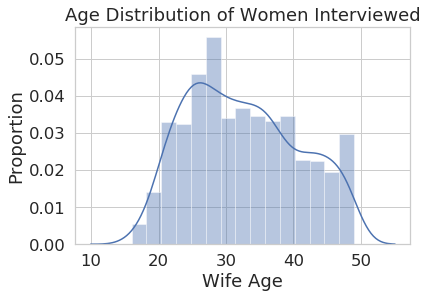

In [7]:
#Age Distribution of Women Surveyed
sns.distplot(data['wife_age'])
plt.xlabel('Wife Age')
plt.ylabel('Proportion')
plt.title('Age Distribution of Women Interviewed')

The distribution above shows that most of the women interviewed were in their mid 20s to early 40s.

Text(0.5, 0, 'Number of Children')

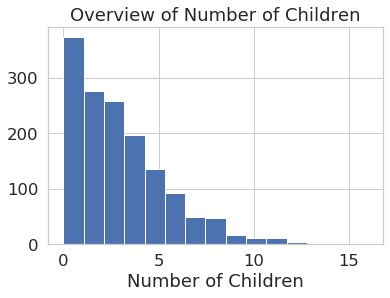

In [8]:
#Distribution of Number of Children
plt.hist(data["num_child"], bins = 15)
plt.title("Overview of Number of Children")
plt.xlabel("Number of Children")

Here we notice that the number of children is between 0 and 16 and a majority of the women survyed have less than 5 children.

Text(0, 0.5, 'Number of Children')

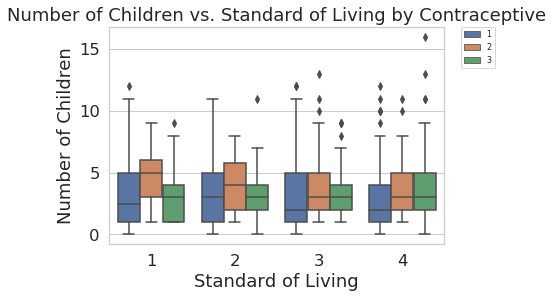

In [9]:
#Standard of Living vs. the Type of Contraceptive
sns.boxplot(x = data['standard_living'], y = data['num_child'], hue = data['contraceptive'])
plt.legend(bbox_to_anchor=(1.05, 1),fontsize=8, loc='upper left', borderaxespad=0.)
plt.title("Number of Children vs. Standard of Living by Contraceptive")
plt.xlabel("Standard of Living")
plt.ylabel("Number of Children")

As we can see, the median number of children is relatively the same. However, it can be observed that the range of the number of children is significantly smaller for a level 4 standard of living than that of others. There are also a lot of high outliers for the same level of standard of living. It's a bit difficult to make accurate predictions with these features unless we focus on levels 1 and 2 of standard of living-- but that's not representative of Indonesia's population.

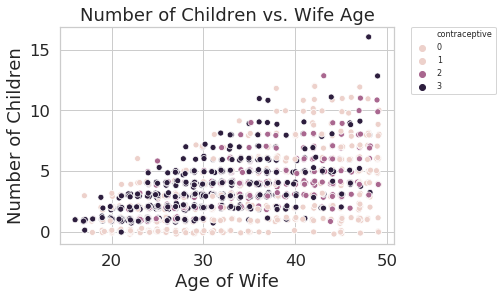

In [10]:
#Number of Children vs. Wife Age
data1 = data[['wife_age','num_child']]
data1 = data1 + np.random.normal(0, 0.1, size = (len(data1),2))
data1['contraceptive']=data['contraceptive']
sns.scatterplot(x=data1['wife_age'],y=data1['num_child'],data=data1,
                hue='contraceptive')
plt.title('Number of Children vs. Wife Age')
plt.xlabel('Age of Wife')
plt.ylabel('Number of Children')
plt.legend(bbox_to_anchor=(1.05, 1),fontsize=8, loc='upper left', borderaxespad=0.)

The graph above shows that women without children tend to not use any form of birth control. It also shows that as women have more children, a form of contraceptive, whether short-term or long-term, is likely to be used. Another notable takeaway is that as women get older, they tend to use short-term or no contraceptive. This might be due to the fact that as women age, it is less likely for them to be able to have children, erasing the need for a long-term contraceptive.

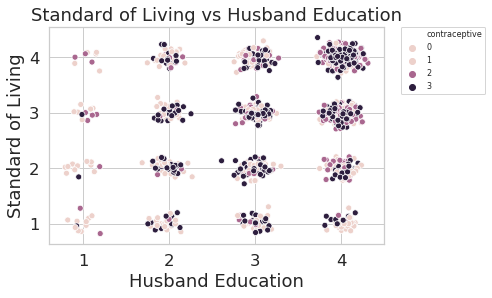

In [11]:
#Standard of Living vs. Husband Education
data1 = data[['husband_education','standard_living']]
data1 = data1 + np.random.normal(0, 0.1, size = (len(data1),2))
data1['contraceptive']=data['contraceptive']
sns.scatterplot(x=data1['husband_education'],y=data1['standard_living'],data=data1,
                hue='contraceptive')
plt.title('Standard of Living vs Husband Education')
plt.xlabel('Husband Education')
plt.ylabel('Standard of Living')
plt.legend(bbox_to_anchor=(1.05, 1),fontsize=8, loc='upper left', borderaxespad=0.)

Here we observe that most of the women surveyed had husbands with a relatively high education. In addition, we see that despite the standard of living, if a husband's education is lower, the wife will likely not use any form of contraceptive. The visualization also shows that if the husband's education is either a 3 or 4, the standard of living is likely to be higher as well. 

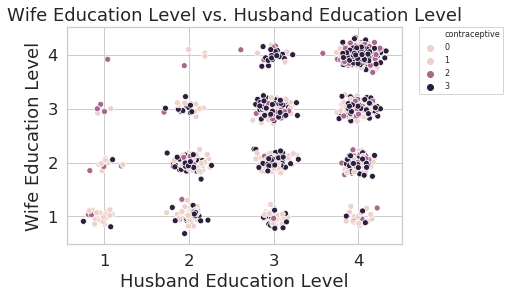

In [12]:
#Level of Wife Education vs Level of Husband Education
data1 = data[['wife_education','husband_education']]
data1 = data1 + np.random.normal(0, 0.1, size = (len(data1),2))
data1['contraceptive']=data['contraceptive']
sns.scatterplot(x=data1['husband_education'],y=data1['wife_education'],data=data1,
                hue='contraceptive')
plt.title('Wife Education Level vs. Husband Education Level')
plt.xlabel('Husband Education Level')
plt.ylabel('Wife Education Level')
plt.legend(bbox_to_anchor=(1.05, 1),fontsize=8, loc='upper left', borderaxespad=0.)

We see that the lower-right diagonal half is more populated with points than the upper-left diagonal half. This could mean that, in a marriage, the husband's education is more important relative to the wife's education. We also see that contraceptive use is more prevelant as both the husband's and wife's education level increases, with some exceptions.

# Data Cleaning: Adding New Features


After studying our data, we were curious to see if adding a variable determining the average household education would play a role in terms of predicting the number of children or the type of contraceptives that would be used. Also, we were aware that the average household education level is essentially linearly dependent to the wife and husband's education, so we made sure to never use them together. 

In [13]:
#Adding an average education 
data['avg_household_education'] = (data['wife_education'] + data["husband_education"])//2
data.head(6)

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive,avg_household_education
0,24,2,3,3,1,1,2,3,0,1,2
1,45,1,3,10,1,1,3,4,0,1,2
2,43,2,3,7,1,1,3,4,0,1,2
3,42,3,2,9,1,1,3,3,0,1,2
4,36,3,3,8,1,1,3,2,0,1,3
5,19,4,4,0,1,1,3,3,0,1,4


# One-Hot Encoding Categorical Variables

Below, we've demonstrated how we've one hot encoded all our categorical variables so that we can accurately use them as features while we make our predictions. 

In [14]:
oh_enc = OneHotEncoder()

#Fitting the encoder to the columns we want to one hot encode
oh_enc.fit(data[['wife_education', 'husband_education','husband_occupation','standard_living','contraceptive', 'avg_household_education']])
#Returns a matrix with values of 1s and 0s
ohe_data = oh_enc.transform(data[['wife_education', 'husband_education','husband_occupation','standard_living','contraceptive', 'avg_household_education']]).todense()
#Create column names
columns = ['wife_edu1','wife_edu2','wife_edu3','wife_edu4',
           'husb_edu1','husb_edu2','husb_edu3','husb_edu4',
           'husb_occ1','husb_occ2','husb_occ3','husb_occ4',
           'std_live1','std_live2','std_live3','std_live4',
           'contra_1','contra_2','contra_3','avg_edu1','avg_edu2','avg_edu3', 'avg_edu4']
#Creating new data frame with just the ohe features
ohe = pd.DataFrame(ohe_data,columns=columns)
data[['wife_edu1','wife_edu2','wife_edu3','wife_edu4',
           'husb_edu1','husb_edu2','husb_edu3','husb_edu4',
           'husb_occ1','husb_occ2','husb_occ3','husb_occ4',
           'std_live1','std_live2','std_live3','std_live4',
           'contra_1','contra_2','contra_3','avg_edu1','avg_edu2','avg_edu3', 'avg_edu4']] = ohe[['wife_edu1','wife_edu2','wife_edu3','wife_edu4',
           'husb_edu1','husb_edu2','husb_edu3','husb_edu4',
           'husb_occ1','husb_occ2','husb_occ3','husb_occ4',
           'std_live1','std_live2','std_live3','std_live4',
           'contra_1','contra_2','contra_3','avg_edu1','avg_edu2','avg_edu3', 'avg_edu4']]

#We've renamed our data for the linear and logistic models so they are easier to access/manipulate

#data_linear includes the one hot encoded version of contraceptive, as our linear models will be 
#predicting the number of children a wife might have. 

#data_logistic does not include the one hot encoded version of contraceptive, as our logistic models
#will be predicting the type of contraceptive used.
data_linear = data.drop(['wife_education',"husband_education","husband_occupation","standard_living","contraceptive","avg_household_education"],axis=1)
data_logistic = data.drop(['contra_1','contra_2','contra_3','wife_education',"husband_education","husband_occupation","standard_living","avg_household_education"],axis =1)
data_linear

,wife_age,num_child,wife_religion,wife_work,media_exposure,wife_edu1,wife_edu2,wife_edu3,wife_edu4,husb_edu1,...,std_live2,std_live3,std_live4,contra_1,contra_2,contra_3,avg_edu1,avg_edu2,avg_edu3,avg_edu4
0,24,3,1,1,0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,45,10,1,1,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,43,7,1,1,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,42,9,1,1,0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,36,8,1,1,0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,33,2,1,0,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1469,33,3,1,1,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1470,39,8,1,0,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1471,33,4,1,0,0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# Creating Models

### Linear Model

For our linear models, we will try to most accurately predict how many children the women surveyed have. We will use different combinations of the other given features and see which combination has the lowest root mean squared error (rmse). 

In [15]:
#Splitting the Data into Train and Test 
y = data_linear['num_child']
X = data_linear.drop('num_child', axis=1)
x_train_lin, x_test_lin, y_train_lin, y_test_lin = train_test_split(X, y,test_size=0.2, random_state=42)


In [16]:
#Find the root mean squared error
def rmse(actual, predicted):
    return np.sqrt(np.mean((actual - predicted) ** 2))

#A Function which fits a model and returns its rmse score
def linear_model(X_data, Y_data):
    linear_model = lm.LinearRegression(fit_intercept=True)
    linear_model.fit(X_data, Y_data)
    Y_fitted = linear_model.predict(X_data)
    rmse_error = rmse(Y_data, Y_fitted)
    return rmse_error


#Training on all features
linear1 = linear_model(x_train_lin.drop(['avg_edu1','avg_edu2','avg_edu3','avg_edu4'],axis=1),y_train_lin)
#Training on wife age only
linear2 = linear_model(pd.DataFrame(x_train_lin['wife_age']),y_train_lin)
#Training on Average Education + Standard of Living
linear3 = linear_model(x_train_lin[['avg_edu1','avg_edu2','avg_edu3', 'avg_edu4','std_live1','std_live2','std_live3','std_live4']],y_train_lin)
#Training on all information about wife 
linear4 = linear_model(x_train_lin[['wife_edu1','wife_edu2','wife_edu3','wife_edu4',"wife_work","wife_religion",'wife_edu1','wife_edu2','wife_edu3','wife_edu4',"wife_age"]],y_train_lin)
#Training on Average Education, Husband_Occupation, Standard of Living 
linear5 = linear_model(x_train_lin[['avg_edu1','avg_edu2','avg_edu3', 'avg_edu4','std_live1','std_live2','std_live3','std_live4','husb_occ1','husb_occ2','husb_occ3','husb_occ4']],y_train_lin)
#Training on Average Household Education, Standard of Living, Husband Occupation, Wife Work 
linear6 = linear_model(x_train_lin[['avg_edu1','avg_edu2','avg_edu3','avg_edu4','std_live1','std_live2','std_live3','std_live4',
                                         'husb_occ1','husb_occ2','husb_occ3','husb_occ4', 'wife_work']], y_train_lin)
#Training on Wife Education, Husband Education 
linear7 = linear_model(x_train_lin[['wife_edu1','wife_edu2','wife_edu3','wife_edu4', 'husb_edu1','husb_edu2','husb_edu3','husb_edu4']], y_train_lin)
#Training on Standard of Living + Media Exposure
linear8 = linear_model(x_train_lin[['std_live1','std_live2','std_live3','std_live4', 'media_exposure']], y_train_lin)
#Training on Wife's Religion + Contraceptive 
linear9 = linear_model(x_train_lin[['wife_religion', 'contra_1','contra_2','contra_3']], y_train_lin)
#Training on Contraceptive + Media Exposure
linear10 = linear_model(x_train_lin[['contra_1','contra_2','contra_3', 'media_exposure']], y_train_lin)
#Training on Contraceptive + Standard of Living
linear11 = linear_model(x_train_lin[['contra_1','contra_2','contra_3','std_live1','std_live2','std_live3','std_live4']], y_train_lin)
#Training on all features with Average Education Level
linear12 = linear_model(x_train_lin.drop(['wife_edu1','wife_edu2','wife_edu3','wife_edu4', 'husb_edu1','husb_edu2','husb_edu3','husb_edu4'],axis=1),y_train_lin)

linear_rmses = [linear1, linear2, linear3, linear4, linear5, linear6,
               linear7, linear8, linear9, linear10, linear11,linear12]
linear_rmses

#Models with the best RMSE scores are the models with all the features (Model 1 and Model 12)

[1.8494866032667647,
 2.024537851322327,
 2.349510111989573,
 1.9307185606738295,
 2.325008231157386,
 2.318641325552956,
 2.3550257673471235,
 2.4031874513130975,
 2.3924882999659607,
 2.3778392461353697,
 2.402703365809919,
 1.845595341136863]

As we can see above, while training our train data, the linear regression model rmse score is lowest when using all the features to predict the number of children a wife might have; however, it is also interesting to see that our linear model performed better with the average household education level, in comparison to the wife and husband's education levels separately.

Below, we will comput the average cross validation rmse for each model.

In [17]:
#compute the average cross validation rmse for each model
#the following rmse function is compatible with the cross_val_score function from scikit-learn
def rmse_score(model, X, y):
    return np.sqrt(np.mean((y - model.predict(X)) ** 2))
def linear_model_cv(x_train,y_train):
    linear_model = lm.LinearRegression(fit_intercept=True)
    linear_model.fit(x_train, y_train)
    Y_fitted = linear_model.predict(x_train)
    #find the accuracy
    score = np.mean(cross_val_score(linear_model, x_train, y_train,scoring=rmse_score, cv = 5))
    return score

In [18]:
linear_cv1 = linear_model_cv(x_train_lin.drop(['avg_edu1','avg_edu2','avg_edu3','avg_edu4'],axis=1),y_train_lin)
linear_cv2 = linear_model_cv(pd.DataFrame(x_train_lin['wife_age']),y_train_lin)
linear_cv3 = linear_model_cv(x_train_lin[['avg_edu1','avg_edu2','avg_edu3', 'avg_edu4','std_live1','std_live2','std_live3','std_live4']],y_train_lin)
linear_cv4 = linear_model_cv(x_train_lin[['wife_edu1','wife_edu2','wife_edu3','wife_edu4',"wife_work","wife_religion",'wife_edu1','wife_edu2','wife_edu3','wife_edu4',"wife_age"]],y_train_lin)
linear_cv5 = linear_model_cv(x_train_lin[['avg_edu1','avg_edu2','avg_edu3', 'avg_edu4','std_live1','std_live2','std_live3','std_live4','husb_occ1','husb_occ2','husb_occ3','husb_occ4']],y_train_lin)
linear_cv6 = linear_model_cv(x_train_lin[['avg_edu1','avg_edu2','avg_edu3','avg_edu4','std_live1','std_live2','std_live3','std_live4',
                                         'husb_occ1','husb_occ2','husb_occ3','husb_occ4', 'wife_work']], y_train_lin)
linear_cv7 = linear_model_cv(x_train_lin[['wife_edu1','wife_edu2','wife_edu3','wife_edu4', 'husb_edu1','husb_edu2','husb_edu3','husb_edu4']], y_train_lin)
linear_cv8 = linear_model_cv(x_train_lin[['std_live1','std_live2','std_live3','std_live4', 'media_exposure']], y_train_lin)
linear_cv9 = linear_model_cv(x_train_lin[['wife_religion', 'contra_1','contra_2','contra_3']], y_train_lin)
linear_cv10 = linear_model_cv(x_train_lin[['contra_1','contra_2','contra_3', 'media_exposure']], y_train_lin)
linear_cv11 = linear_model_cv(x_train_lin[['contra_1','contra_2','contra_3','std_live1','std_live2','std_live3','std_live4']], y_train_lin)
linear_cv12 = linear_model_cv(x_train_lin.drop(['wife_edu1','wife_edu2','wife_edu3','wife_edu4', 'husb_edu1','husb_edu2','husb_edu3','husb_edu4'],axis=1),y_train_lin)

linear_cv_rmses = [linear_cv1, linear_cv2, linear_cv3, linear_cv4, linear_cv5, linear_cv6,
               linear_cv7, linear_cv8, linear_cv9, linear_cv10, linear_cv11,linear_cv12]

print('The Cross Validation rmse for each model are:')
linear_cv_rmses

The Cross Validation rmse for each model are:


[1.8746697966670012,
 2.023528519218715,
 2.3572010281972213,
 1.9369591169986589,
 2.342381379630863,
 2.3310582365082526,
 2.37096419670981,
 2.4103228725598345,
 2.3938576815092474,
 2.3829039731917914,
 2.4138039447545814,
 1.8654714718461178]

These validation errors reveal that the model with the lowest rmse is still the linear model that uses all the features, with average education in place of husband and wife education. It is important to note that these rmse's are slightly higher than our trained models. This helps remind us that our model may not work as well on new data versus our trained data. 

### Logistic Regression Model

For our logistic regression models, we will try to most accurately predict what type contraceptive women use given certain combinations of our other given features.

In [19]:
#Splitting the data into Train and Test
X = data_logistic.drop(['contraceptive'],axis=1)
y = data_logistic['contraceptive']
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(X, y, test_size=0.20, random_state=42)

In [20]:
#A Function which fits a model and returns its Accuracy Score
def logistic_regression(x_train,y_train):
    model = LogisticRegression()
    model.fit(x_train, y_train)
    y_fitted = model.predict(x_train)
    #find the accuracy
    training_accuracy = accuracy_score(y_fitted, y_train)
    return training_accuracy

#Training on all original feeatures
logistic1 = logistic_regression(x_train_log.drop(['avg_edu1','avg_edu2','avg_edu3', 'avg_edu4'],axis=1),y_train_log)
#Training on Husband Education, Wife Education, and Standard of Living
logistic2 = logistic_regression(x_train_log[['husb_edu1','husb_edu2','husb_edu3','husb_edu4','wife_edu1','wife_edu2','wife_edu3','wife_edu4','std_live1','std_live2','std_live3','std_live4']],y_train_log)
#Training on Husband Education, Wife Education, Husband Occupation + Wife Work
logistic3 = logistic_regression(x_train_log[['husb_edu1','husb_edu2','husb_edu3','husb_edu4','wife_edu1','wife_edu2','wife_edu3','wife_edu4','husb_occ1','husb_occ2','husb_occ3','husb_occ4','wife_work']],y_train_log)
#Training on Number of Children + Standard of Living
logistic4 = logistic_regression(x_train_log[['num_child','std_live1','std_live2','std_live3','std_live4']],y_train_log)
#Training on Wife Age
logistic5 = logistic_regression(x_train_log[['wife_age']],y_train_log)
#Training on Wife Religion
logistic6 = logistic_regression(x_train_log[['wife_religion']],y_train_log)
#Training on Wife Work, Wife Education + Wife Age
logistic7 = logistic_regression(x_train_log[['wife_work','wife_edu1','wife_edu2','wife_edu3','wife_edu4','wife_age']],y_train_log)
#Training on Husband Occupation, Husband Occupation + Standard of Living
logistic8 = logistic_regression(x_train_log[['husb_occ1','husb_occ2','husb_occ3','husb_occ4','husb_edu1','husb_edu2','husb_edu3','husb_edu4','std_live1','std_live2','std_live3','std_live4']],y_train_log)
#Husband Education, Wife Education
logistic9 = logistic_regression(x_train_log.drop(['husb_edu1','husb_edu2','husb_edu3','husb_edu4','wife_edu1','wife_edu2','wife_edu3','wife_edu4'],axis=1),y_train_log)

logistic_accuracy = [logistic1,logistic2,logistic3,logistic4,logistic5,logistic6,logistic7,logistic8,logistic9]
logistic_accuracy

#Top 2 models with the best training accuracy are the models using all the features (Model 1 and 9)

/srv/conda/envs/data100/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/srv/conda/envs/data100/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

[0.5127334465195246,
 0.44906621392190155,
 0.4626485568760611,
 0.42699490662139217,
 0.41850594227504245,
 0.42614601018675724,
 0.45585738539898135,
 0.4465195246179966,
 0.5093378607809848]

Similar to the linear models, the logistic model that used all of the given features yielded the highest training accuracy; however, the training accuracy for our logistic model trained with average education was slightly lower. Despite our efforts to create a decent model by exploring various combinations of features, each model had a low training accuracy, with our "best" accuracy being a mere 51.27%

In order to better understand our models, though, we must use cross validation. This way, we can have an idea of what our test accuracy might be. The following cell computes the average validation accuracy for each logistic model created above. 

In [21]:
#compute average cross validation accuracy for each model
def logistic_regression_cv(x_train,y_train):
    model = LogisticRegression()
    model.fit(x_train, y_train)
    y_fitted = model.predict(x_train)
    #find the accuracy
    score = np.mean(cross_val_score(model, x_train, y_train, cv = 5))
    return score

In [22]:
cv1 = logistic_regression_cv(x_train_log.drop(['avg_edu1','avg_edu2','avg_edu3', 'avg_edu4'],axis=1),y_train_log)
cv2 = logistic_regression_cv(x_train_log[['husb_edu1','husb_edu2','husb_edu3','husb_edu4','wife_edu1','wife_edu2','wife_edu3','wife_edu4','std_live1','std_live2','std_live3','std_live4']],y_train_log)
cv3 = logistic_regression_cv(x_train_log[['husb_edu1','husb_edu2','husb_edu3','husb_edu4','wife_edu1','wife_edu2','wife_edu3','wife_edu4','husb_occ1','husb_occ2','husb_occ3','husb_occ4','wife_work']],y_train_log)
cv4 = logistic_regression_cv(x_train_log[['num_child','std_live1','std_live2','std_live3','std_live4']],y_train_log)
cv5 = logistic_regression_cv(x_train_log[['wife_age']],y_train_log)
cv6 = logistic_regression_cv(x_train_log[['wife_religion']],y_train_log)
cv7 = logistic_regression_cv(x_train_log[['wife_work','wife_edu1','wife_edu2','wife_edu3','wife_edu4','wife_age']],y_train_log)
cv8 = logistic_regression_cv(x_train_log[['husb_occ1','husb_occ2','husb_occ3','husb_occ4','husb_edu1','husb_edu2','husb_edu3','husb_edu4','std_live1','std_live2','std_live3','std_live4']],y_train_log)
cv9 = logistic_regression_cv(x_train_log.drop(['husb_edu1','husb_edu2','husb_edu3','husb_edu4','wife_edu1','wife_edu2','wife_edu3','wife_edu4'],axis=1),y_train_log)

cross_validation_accuracy = [cv1, cv2, cv3, cv4, cv5, cv6, cv7, cv8, cv9]

print('The Cross Validation scores for each model are:',cross_validation_accuracy)

/srv/conda/envs/data100/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/srv/conda/envs/data100/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

The Cross Validation scores for each model are: [0.48983411467724486, 0.431283808150018, 0.44480706815723037, 0.4244031734583483, 0.4185322755138839, 0.41510998918139197, 0.44908763072484675, 0.4252939055174901, 0.5025604038946989]


/srv/conda/envs/data100/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/srv/conda/envs/data100/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

Above, we found the average cross validation accuracy for our logistic models. Here, we see that despite the relatively high training accuracy of the first logistic model (using all features), the model with the highest validation score uses all the features with average education in place of husband and wife education.

# Regularization

### Lasso

We will begin with Lasso Regression on the linear model

In [23]:
y = data_linear['num_child']
X = data_linear.drop('num_child', axis=1)

#Centering the Data
x_normalized = (X - np.mean(X)) / np.std(X)

#Splitting into Train and Test Data
x_train_l, x_test_l, y_train_l, y_test_l = train_test_split(x_normalized, y, test_size=0.2, random_state=42)

In [24]:
#Computes the RMSE
def rmse_score(model, X, y):
    return np.sqrt(np.mean((y - model.predict(X)) ** 2))

#A Function which fits conducts Lasso Regression and returns the RMSE
def lasso_model(x, y):    
    alpha_arr = np.linspace(0.1, 1.5,100)
    cv_errors = []
    model = Pipeline([
            ("transformer", StandardScaler()),
            ("LinearModel", Lasso(alpha = alpha_arr, max_iter = 1000000))
    ])
    for alpha in alpha_arr:
        model.set_params(LinearModel__alpha=alpha)

        # compute the cross validation error
        cv_error = np.mean(cross_val_score(model, x, y, scoring = rmse_score, cv = 5))

        cv_errors.append(cv_error)

    best_alpha_lasso = alpha_arr[np.argmin(cv_errors)]
    lasso_model = Lasso(alpha = best_alpha_lasso)
    lasso_model.fit(x,y)
    y_fitted = lasso_model.predict(x)
    return rmse(y,y_fitted)

#Training on all original features
lasso1 = lasso_model(x_train_l.drop(['avg_edu1','avg_edu2','avg_edu3', 'avg_edu4'],axis=1),y_train_l)
#Training on wife age only
lasso2 = lasso_model(pd.DataFrame(x_train_l['wife_age']),y_train_l)
#Training on Average Education + Standard of Living
lasso3 = lasso_model(x_train_l[['avg_edu1','avg_edu2','avg_edu3', 'avg_edu4','std_live1','std_live2','std_live3','std_live4']],y_train_l)
#Training on all information about wife
lasso4 = lasso_model(x_train_l[['wife_edu1','wife_edu2','wife_edu3','wife_edu4',"wife_work","wife_religion",'wife_edu1','wife_edu2','wife_edu3','wife_edu4',"wife_age"]],y_train_l)
#Training on Average Education, Husband_Occupation + Standard of Living 
lasso5 = lasso_model(x_train_l[['avg_edu1','avg_edu2','avg_edu3', 'avg_edu4','std_live1','std_live2','std_live3','std_live4','husb_occ1','husb_occ2','husb_occ3','husb_occ4']],y_train_l)
#Training on Average Household Education, Standard of Living, Husband Occupation + Wife Work 
lasso6 = lasso_model(x_train_l[['avg_edu1','avg_edu2','avg_edu3', 'avg_edu4', 'std_live1','std_live2','std_live3','std_live4',
                                         'husb_occ1','husb_occ2','husb_occ3','husb_occ4', 'wife_work']], y_train_l)
#Training on Wife Education + Husband Education 
lasso7 = lasso_model(x_train_l[['wife_edu1','wife_edu2','wife_edu3','wife_edu4', 'husb_edu1','husb_edu2','husb_edu3','husb_edu4']], y_train_l)
#Training on Standard of Living + Media Exposure
lasso8 = lasso_model(x_train_l[['std_live1','std_live2','std_live3','std_live4', 'media_exposure']], y_train_l)
#Training on Religion + Contraceptive
lasso9 = lasso_model(x_train_l[['wife_religion', 'contra_1','contra_2','contra_3']], y_train_l)
#Training on Contraceptive + Media Exposure
lasso10 = lasso_model(x_train_l[['contra_1','contra_2','contra_3', 'media_exposure']], y_train_l)
#Training on Contraceptive + Standard of Living
lasso11 = lasso_model(x_train_l[['contra_1','contra_2','contra_3','std_live1','std_live2','std_live3','std_live4']], y_train_l)
#Training on All Features + Average Household Education
lasso12 = lasso_model(x_train_l.drop(['wife_edu1','wife_edu2','wife_edu3','wife_edu4', 'husb_edu1','husb_edu2','husb_edu3','husb_edu4'],axis=1),y_train_l)

lasso_rmses = [lasso1, lasso2, lasso3, lasso4, lasso5, lasso6,
               lasso7, lasso8, lasso9, lasso10, lasso11,lasso12]
lasso_rmses

[1.8749932354741272,
 2.026944267016714,
 2.360894235066107,
 1.9417854957351117,
 2.347748585375696,
 2.338012762194068,
 2.3607970055075365,
 2.40668918788703,
 2.39816666377254,
 2.383448879754993,
 2.406718665733237,
 1.8697934397589746]

Above we have shown a few different models and there scores when using a Lasso Model. However, we are more interested in using the Lasso Regression model in order to find the best value of alpha so that we can find the best combination of features to use.

### Using Best Features from Lasso Regression

In [25]:
#From our lasso regression model, we noticed that with an alpha of 0.01 our best features are the following
from sklearn.linear_model import Lasso
lasso_test = Lasso(alpha = 0.01)
y_fitted = lasso_test.fit(x_train_l, y_train_l)
none_zeros = lasso_test.coef_

#count number of nonzeros, return features that matter the most
best_features_index = []
dont_care_index = []
for i in np.arange(len(none_zeros)):
    if none_zeros[i] != 0:
        best_features_index.append(i)
    else:
        dont_care_index.append(0)

best_features_df = x_train_l.iloc[:, best_features_index]
best = list(best_features_df.columns)
best

['wife_age',
 'wife_religion',
 'wife_work',
 'media_exposure',
 'wife_edu1',
 'wife_edu2',
 'wife_edu4',
 'husb_edu2',
 'husb_edu4',
 'husb_occ1',
 'husb_occ2',
 'husb_occ4',
 'std_live1',
 'std_live3',
 'std_live4',
 'contra_1',
 'contra_2',
 'avg_edu1',
 'avg_edu2',
 'avg_edu4']

Now that we know what our best features are, we should retrain our model to only include those features. To keep our covariate matrix linearly independent, we must retrain it with two sets of best features: with 'avg_edu' and without 'avg_edu'.

In [26]:
best1 = ['wife_age', 'wife_religion', 'wife_work', 'media_exposure', 'wife_edu1', 'wife_edu2', 'wife_edu4',
         'husb_edu2', 'husb_edu4', 'husb_occ1', 'husb_occ2', 'husb_occ4', 'std_live1', 'std_live3',
         'std_live4', 'contra_1', 'contra_2']

best2 = ['wife_age', 'wife_religion', 'wife_work', 'media_exposure','husb_occ1', 'husb_occ2', 'husb_occ4', 'std_live1',
         'std_live3', 'std_live4', 'contra_1', 'contra_2', 'avg_edu1', 'avg_edu2', 'avg_edu4']
##ADDED LATER WITH BEST FEATURES 
linear_best1 = linear_model(x_train_lin[best1], y_train_lin)
linear_best2 = linear_model(x_train_lin[best2], y_train_lin)

#UPDATED WITH BEST FEATURES
lasso_best1 = lasso_model(best_features_df[best1], y_train_lin)
lasso_best2 = lasso_model(best_features_df[best2], y_train_lin)


linear_best1, linear_best2, lasso_best1, lasso_best2

(1.8501110487138628, 1.845595341136863, 1.8749947931098125, 1.8697930957536788)

As we can see, using our best features for both OLS and Lasso have similar accuracies (with OLS being slightly better)-- even after retraining the data on our best features. Let's try L2 Regularization.

### Ridge

Now we will run a Ridge Regression Regularization Model

In [27]:
#Splitting into Train and Test Data
x_train, x_test, Y_train, Y_test = train_test_split(data_linear.drop('num_child',axis=1), data_linear['num_child'], test_size=0.20, random_state=42)
#Centering the features
x_train_centered = (x_train-sum(x_train.values)/len(x_train))/np.std(x_train)

In [28]:
#Function that conducts the ridge regression using various alpha and returns the best alpha and cross validation error
def ridge_regression(x_train,y_train):
    alpha_arr = np.linspace(0.02, 0.5, 60)
    cv_errors = []
    
    model = Pipeline([
        ('transformer', StandardScaler()),
        ('LinearModel',Ridge(alpha_arr))
    ])
    for alpha in alpha_arr:
        model.set_params(LinearModel__alpha = alpha)
        
        cv_error = np.mean(cross_val_score(model, x_train, y_train, scoring = rmse_score, cv = 5))
        cv_errors.append(cv_error)
    best_alpha_ridge = alpha_arr[np.argmin(cv_errors)]
    print(f"The best alpha value is {best_alpha_ridge}"),
    print(f"Cross validation error for the best alpha value is {cv_errors[np.argmin(cv_errors)]}")

In [29]:
ridge_regression(x_train_centered,Y_train)

The best alpha value is 0.5
Cross validation error for the best alpha value is 1.88053205501051


In [30]:
#RIDGE MODEL
ridge_model = Pipeline([
        ("transformer", StandardScaler()),
        ("LinearModel", Ridge(0.5, max_iter = 1000000))
])

ridge_model.fit(x_train_centered, Y_train)

ridge1 = rmse_score(ridge_model, x_train_centered, Y_train)
ridge1

1.8432990775453855

Above, we decided to create a ridge model using all features including average education, as this was the linear model that had the lowest rmse. The function ridge_regression() finds the best alpha given our features and returns the cross validation error for that alpha value. After, we performed ridge regression using the best alpha and computed the rmse for that model, which which see is very similar to the scores of our previous models.

### Decision Trees and Random Forest Model

Decision Trees/Random Forests work best with categorical data, so we'll use it to predict type of contraceptive (just like in our logistic regression model). First, let's split our data again.

In [31]:
X = data_logistic.drop(['contraceptive'],axis=1)
y = data_logistic['contraceptive']
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(X, y, test_size=0.20, random_state=42)

#### Decision Trees

In [32]:
decision_tree_model = tree.DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(x_train_log,y_train_log)

dt_training_accuracy = decision_tree_model.score(x_train_log,y_train_log)
print(f'training accuracy = {dt_training_accuracy}')

cv_dt = np.mean(cross_val_score(decision_tree_model, x_train_log, y_train_log, cv = 5))
print(f'cross validation = {cv_dt}')

cnf_matrix = confusion_matrix(y_test_log, decision_tree_model.predict(x_test_log))
tn = cnf_matrix[0,0]
fn = cnf_matrix[1,0]
tp = cnf_matrix[1,1]
fp = cnf_matrix[0,1]

precision = tp / (tp+fp)
recall = tp / (tp+fn)

print(f'precision = {precision:.4f}')
print(f'recall = {recall:.4f}')



training accuracy = 0.9584040747028862
cross validation = 0.4490948431301839
precision = 0.6098
recall = 0.5682


#### Random Forest

In [33]:
random_forest_model = ensemble.RandomForestClassifier(n_estimators = 20, random_state = 42)
random_forest_model.fit(x_train_log, y_train_log)
rf_train_accuracy = random_forest_model.score(x_train_log, y_train_log)
print(f'training accuracy = {rf_train_accuracy}')


cv_rf = np.mean(cross_val_score(random_forest_model, x_train_log, y_train_log, cv = 5))
print(f'cross validation = {cv_rf}')

cnf_matrix = confusion_matrix(y_test_log, random_forest_model.predict(x_test_log))
tn = cnf_matrix[0,0]
fn = cnf_matrix[1,0]
tp = cnf_matrix[1,1]
fp = cnf_matrix[0,1]

precision = tp / (tp+fp)
recall = tp / (tp+fn)

print(f'precision = {precision:.4f}')
print(f'recall = {recall:.4f}')

training accuracy = 0.9516129032258065
cross validation = 0.5127226830147855
precision = 0.5814
recall = 0.5319


Although the numbers aren't quite off, the Decision Tree Model has higher values for all metrics (with the exception of average cross validation score): training accuracy, precision, and recall. Thus, we'll use that as our "best" model for predicting type of contraceptive.

In [34]:
dt_test_accuracy = decision_tree_model.score(x_test_log,y_test_log)
print(f'Decision Tree test accuracy = {dt_test_accuracy}')

Decision Tree test accuracy = 0.5050847457627119


Given the limited information we have about this data, a test accuracy of above 50% is alright. In order to improve the effectiveness of our models, however, in the future we would like to look into other potential features that may help us understand our data more accurately.

Below, we have summarized the accuracy and rmse scores of the models we looked at. We chose to include the top 2 models from the logistic and linear models and alone with the scores for the lasso,ridge,and random forest models.We also calculated their appropriate scores on the test data. 

In [35]:
linear1_test = linear_model(x_test_lin.drop(['avg_edu1','avg_edu2','avg_edu3','avg_edu4'],axis=1),y_test_lin)
linear2_test = linear_model(x_test_lin.drop(['husb_edu1','husb_edu2','husb_edu3','husb_edu4','wife_edu1','wife_edu2','wife_edu3','wife_edu4'],axis=1),y_test_lin)
log1_test = logistic_regression(x_test_log.drop(['avg_edu1','avg_edu2','avg_edu3', 'avg_edu4'],axis=1),y_test_log)
log2_test = logistic_regression(x_test_log.drop(['husb_edu1','husb_edu2','husb_edu3','husb_edu4','wife_edu1','wife_edu2','wife_edu3','wife_edu4'],axis=1),y_test_log)
best_features_df_test = x_test_l.iloc[:, best_features_index]
lasso1_test = lasso_model(best_features_df_test[best1], y_test_lin)
lasso2_test = lasso_model(best_features_df_test[best2], y_test_lin)

x_test_centered = (x_test-sum(x_test.values)/len(x_test))/np.std(x_test)
ridge_test = rmse_score(ridge_model, x_test_centered, Y_test)

dt_test = decision_tree_model.score(x_test_log,y_test_log)
rf_test = random_forest_model.score(x_test_log, y_test_log)

/srv/conda/envs/data100/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/srv/conda/envs/data100/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

In [36]:
#RMSE: Linear, Lasso, Ridge
#ACCURACY: Logistic, Random Forest
rmse_train = [linear_best1, linear_best2, lasso_best1, lasso_best2,ridge1]
rmse_test = [linear1_test, linear2_test, lasso1_test, lasso2_test, ridge_test]
accuracy_train = [logistic1, logistic9,dt_training_accuracy,rf_train_accuracy]
accuracy_test = [log1_test, log2_test,dt_test, rf_test]
labels_rmse = ['Lin Original','Lin w/ Avg. Edu','Lasso Original','Lasso w/ Avg. Edu','Ridge']
labels_acc = ['Log Original','Log w/ Avg. Edu','Decision Tree','Random Forest']


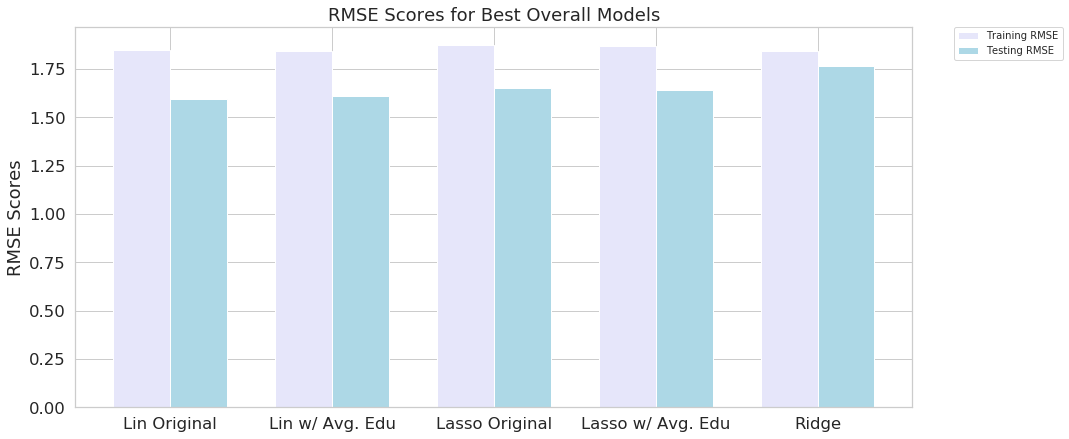

In [37]:
#Code For Grouped Bar Plots found online @https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/barchart.html

x = np.arange(len(labels_rmse))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,7))

rects1 = ax.bar(x - width/2, rmse_train, width, label='Training RMSE',color='lavender')
rects2 = ax.bar(x + width/2, rmse_test, width, label='Testing RMSE',color='lightblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('RMSE Scores')
ax.set_title('RMSE Scores for Best Overall Models')
ax.set_xticks(x)
ax.set_xticklabels(labels_rmse)
ax.legend()
ax.legend(bbox_to_anchor=(1.05, 1),fontsize=10, loc='upper left', borderaxespad=0.)

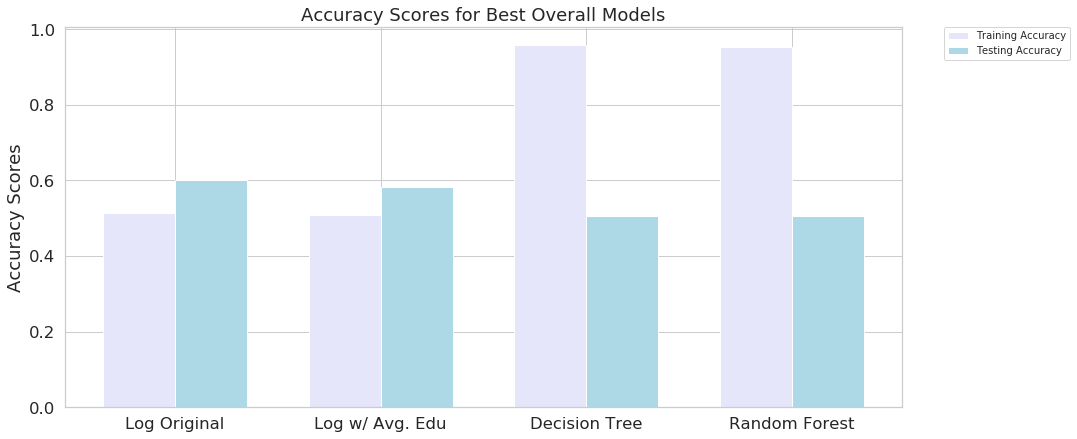

In [38]:
#Code For Grouped Bar Plots found online @https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/barchart.html

x = np.arange(len(labels_acc))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,7))

rects1 = ax.bar(x - width/2, accuracy_train , width, label='Training Accuracy',color='lavender')
rects2 = ax.bar(x + width/2, accuracy_test, width, label='Testing Accuracy',color = 'lightblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy Scores')
ax.set_title('Accuracy Scores for Best Overall Models')
ax.set_xticks(x)
ax.set_xticklabels(labels_acc)
ax.legend()
ax.legend(bbox_to_anchor=(1.05, 1),fontsize=10, loc='upper left', borderaxespad=0.)

### Next Steps

Now, we are ready to evaluate our results. Along with this notebook, a pdf of our report is submitted detailing our methods and findings. There, we also discuss ethical implications of our study as well as offer suggestions on how to further explore this topic.